### 1. Task: Write a function to simulate the SI dynamic on a generic network and provide a visualisation.

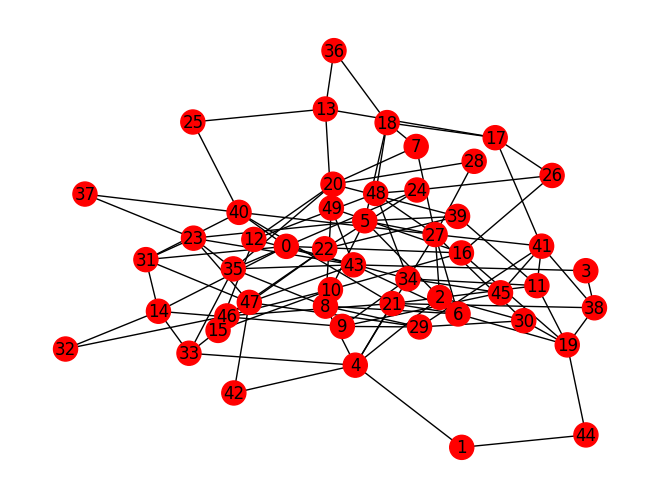

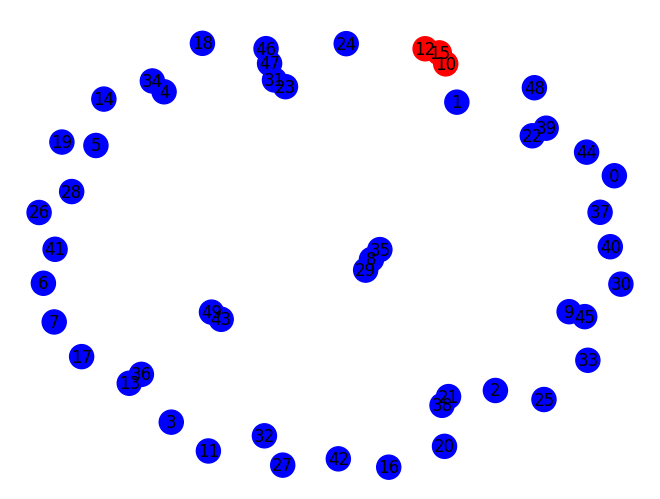

In [21]:
import networkx as nx
import matplotlib.pyplot as plt
import random

def si_simulation(graph, beta, seed_node, max_steps=100):
    infected_nodes = set()
    infected_nodes.add(seed_node)
    nodes = set(graph.nodes)

    for step in range(max_steps):
        cp_infected_nodes = infected_nodes.copy()
        susceptible_nodes = nodes - cp_infected_nodes

        for node in susceptible_nodes:
            neighbors = set(graph.neighbors(node))
            infected_neighbors = neighbors & cp_infected_nodes

            v = len(infected_neighbors)
            if v == 0:
                continue
            p = (1 - beta) ** v
            if random.uniform(0, 1) < p:
                continue
            else:
                infected_nodes.add(node)


    return list(infected_nodes)

def visualize_epidemic(graph, infected_nodes):
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, node_color=['red' if node in infected_nodes else 'blue' for node in graph.nodes], with_labels=True)
    plt.show()

# Example usage with two provided graphs
graph1_1 = nx.read_gml('graph1.1.gml')
graph1_2 = nx.read_gml('graph1.2.gml')

beta = 0.5
seed = "10"

infected_nodes1_1 = si_simulation(graph1_1, beta, seed)
visualize_epidemic(graph1_1, infected_nodes1_1)

infected_nodes1_2 = si_simulation(graph1_2, beta, seed)
visualize_epidemic(graph1_2, infected_nodes1_2)


# 2. Task:

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import pandas as pd


def sis_simulation(graph, beta, gamma, seed, max_steps=100):
    random.seed(seed)
    p = random.uniform(0, 1)

    nodes = set(graph.nodes)
    infected_nodes = set(random.sample(nodes, int(p * len(graph.nodes))))
    susceptible_nodes = nodes - infected_nodes

    rho_i = []
    rho_s = []

    for step in range(max_steps):
        cp_infected_nodes = infected_nodes.copy()
        cp_susceptible_nodes = susceptible_nodes.copy()
        rho_i.append(len(cp_infected_nodes) / len(nodes))
        rho_s.append(len(cp_susceptible_nodes) / len(nodes))

        for node in cp_susceptible_nodes:
            neighbors = set(graph.neighbors(node))
            infected_neighbors = neighbors & cp_infected_nodes

            v = len(infected_neighbors)
            p_infection = 1 - (1 - beta) ** v
            if random.uniform(0, 1) < p_infection:
                infected_nodes.add(node)
                susceptible_nodes.remove(node)

        for node in cp_infected_nodes:
            if random.uniform(0, 1) < gamma:
                infected_nodes.remove(node)
                susceptible_nodes.add(node)

    return rho_i, rho_s

def moving_average(data, window_size):
    return pd.Series(data).rolling(window=window_size).mean()

def sis_simulation_and_plot(graph_file, beta, gamma, seed, max_steps=1000, window_size=20):
    # Load the graph
    graph = nx.read_gml(graph_file)

    # Run the SIS simulation
    infected_ratios, susceptible_ratios = sis_simulation(graph, beta, gamma, seed, max_steps)

    # Calculate moving averages
    infected_ratios_smooth = moving_average(infected_ratios, window_size)
    susceptible_ratios_smooth = moving_average(susceptible_ratios, window_size)

    # Plot results
    plt.plot(infected_ratios_smooth, label='Infected Ratio')
    plt.plot(susceptible_ratios_smooth, label='Susceptible Ratio')
    plt.xlabel('Time Step')
    plt.ylabel('Ratio')
    plt.title(f'SIS Simulation Results for {graph_file}')
    plt.legend()
    plt.show()


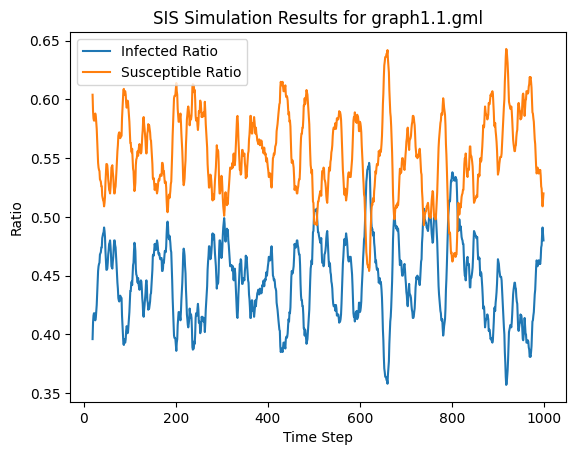

In [4]:
# Example usage
beta = 0.2
gamma = 0.4
seed = 13373

sis_simulation_and_plot('graph1.1.gml', beta, gamma, seed)

# 3. Task

β=0.01, γ=0.10, β/γ=0.10
β=0.02, γ=0.13, β/γ=0.13
β=0.03, γ=0.16, β/γ=0.17
β=0.04, γ=0.20, β/γ=0.22
β=0.07, γ=0.25, β/γ=0.28
β=0.11, γ=0.32, β/γ=0.36
β=0.18, γ=0.40, β/γ=0.46
β=0.30, γ=0.50, β/γ=0.60
β=0.49, γ=0.63, β/γ=0.77
β=0.79, γ=0.79, β/γ=1.00


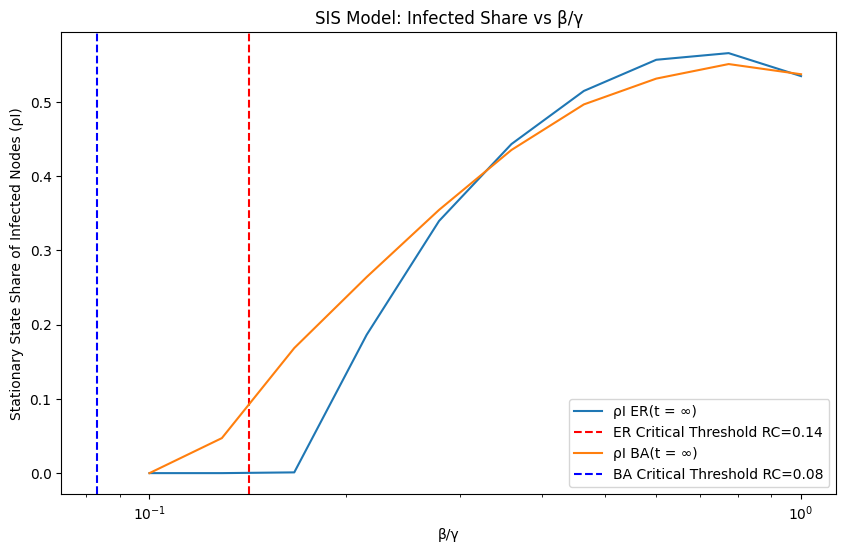

In [22]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def sis_simulation(graph, beta, gamma, seed, max_steps=1000):
    random.seed(seed)
    p = random.uniform(0, 1)

    nodes = set(graph.nodes)
    infected_nodes = set(np.random.choice(list(nodes), size=int(p * len(nodes)), replace=False))
    susceptible_nodes = nodes - infected_nodes

    for step in range(max_steps):
        cp_infected_nodes = infected_nodes.copy()
        cp_susceptible_nodes = susceptible_nodes.copy()

        for node in cp_susceptible_nodes:
            neighbors = set(graph.neighbors(node))
            infected_neighbors = neighbors & cp_infected_nodes

            v = len(infected_neighbors)
            p_infection = 1 - (1 - beta) ** v
            if random.uniform(0, 1) < p_infection:
                infected_nodes.add(node)
                susceptible_nodes.remove(node)

        for node in cp_infected_nodes:
            if random.uniform(0, 1) < gamma:
                infected_nodes.remove(node)
                susceptible_nodes.add(node)

    return len(infected_nodes) / len(nodes)

def average_sis_simulation(graph, beta, gamma, sample_size=100, seed=None):
    results = [sis_simulation(graph, beta, gamma, seed, max_steps=1000) for _ in range(sample_size)]
    return np.mean(results)

# Parameters
beta_gamma_values = np.logspace(-1, 0, 10)
gamma_values = np.logspace(-1, -0.1, 10)
beta_values = beta_gamma_values * gamma_values
sample_size = 100
for beta, gamma in zip(beta_values, gamma_values):
    print(f'β={beta:.2f}, γ={gamma:.2f}, β/γ={beta/gamma:.2f}')
    
# Create Erdos-Renyi network
N_er = 500
p_er = 6 / N_er
er_graph = nx.erdos_renyi_graph(N_er, p_er)

# Create Barabasi-Albert network
N_ba = 500
m_ba = 3
ba_graph = nx.barabasi_albert_graph(N_ba, m_ba)

# Perform simulations and calculate averages
rho_i_er = [average_sis_simulation(er_graph, beta, gamma, sample_size) for beta, gamma in zip(beta_values, gamma_values)]
rho_i_ba = [average_sis_simulation(ba_graph, beta, gamma, sample_size) for beta, gamma in zip(beta_values, gamma_values)]

def calculate_critical_er_threshold(graph):
    avg_degree = sum(dict(graph.degree()).values()) / len(graph)
    return 1 / (avg_degree + 1)

def calculate_critical_ba_threshold(graph):
    avg_degree = sum(dict(graph.degree()).values()) / len(graph)
    avg_square_degree = sum([degree ** 2 for degree in dict(graph.degree()).values()]) / len(graph)
    return avg_degree / avg_square_degree

# Critical thresholds
rc_er = calculate_critical_er_threshold(er_graph)
rc_ba = calculate_critical_ba_threshold(ba_graph)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(beta_gamma_values, rho_i_er, label=f'ρI ER(t = ∞)')
plt.axvline(x=rc_er, color='r', linestyle='--', label=f'ER Critical Threshold RC={rc_er:.2f}')
plt.plot(beta_gamma_values, rho_i_ba, label=f'ρI BA(t = ∞)')
plt.axvline(x=rc_ba, color='b', linestyle='--', label=f'BA Critical Threshold RC={rc_ba:.2f}')

plt.xscale('log')
plt.xlabel('β/γ')
plt.ylabel('Stationary State Share of Infected Nodes (ρI)')
plt.title('SIS Model: Infected Share vs β/γ')
plt.legend()
plt.show()
